<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [4]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic = pd.read_csv('../../DATA/titanic.csv')

# Explore Dataset

## Head

In [5]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [6]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [7]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [8]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [9]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [11]:
# ANSWER
#check if there are children in the null values
Child_nullAge = titanic[(titanic.Name.str.contains('Master'))&(titanic.Age.isnull())]
Child_nullAge
#get the index so they can be utilize to replace these nulls
Child_nullAge.index

Int64Index([65, 159, 176, 709], dtype='int64')

In [12]:
titanic.columns.get_loc('Age')

5

In [13]:
#review what is the age mean of the group under in order to assign this value to master null
under18= pd.cut(titanic.Age, bins=[0,18,np.inf])
under18
groupby_under18_groups= titanic.groupby(under18).mean()
groupby_under18_groups

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
"(0.0, 18.0]",445.496403,0.503597,2.561151,10.717050,1.258993,0.935252,32.500721
"(18.0, inf]",449.328696,0.382609,2.158261,34.287826,0.332174,0.309565,35.224840


In [14]:
#replace the null values of the children by the mean for this category = 10.7
titanic.iloc[[65,159,176,709],5:6]=10.7
#Check that values have been replaced
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#replace the remaining nan values by median of age
median= titanic['Age'].median()
titanic['Age'].fillna(median, inplace=True)
#Check that values have been replaced
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [16]:
# ASNWER
titanic.Cabin.value_counts()
# Add an 'unknown' category to replace Null values in cabin
titanic['Cabin'].fillna('unknown', inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Embarked

In [40]:
# ANSWER

# Describe

Describe your dataset.

In [41]:
# ANSWER

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [34]:
df_feature = titanic.groupby(by=['Survived','Pclass']).agg({'PassengerId': 'count'})
print(df_feature)
print(df_feature.unstack())
print(df_feature.unstack(0))

                 PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119
         PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119
         PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119


In [26]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

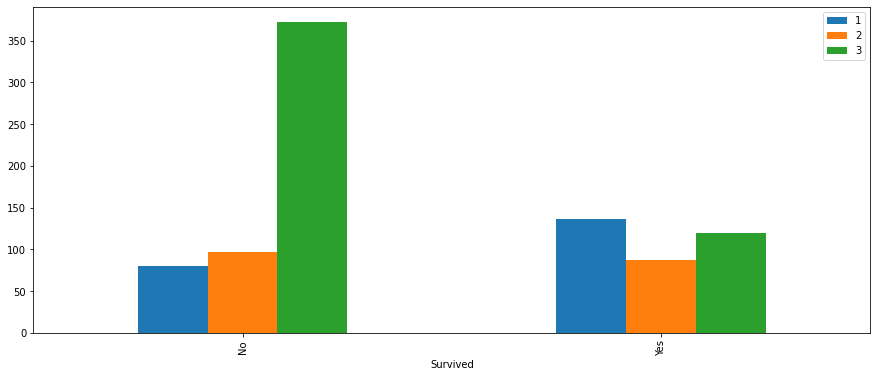

In [27]:
# ANSWER
bar_charts(titanic, 'Pclass')

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

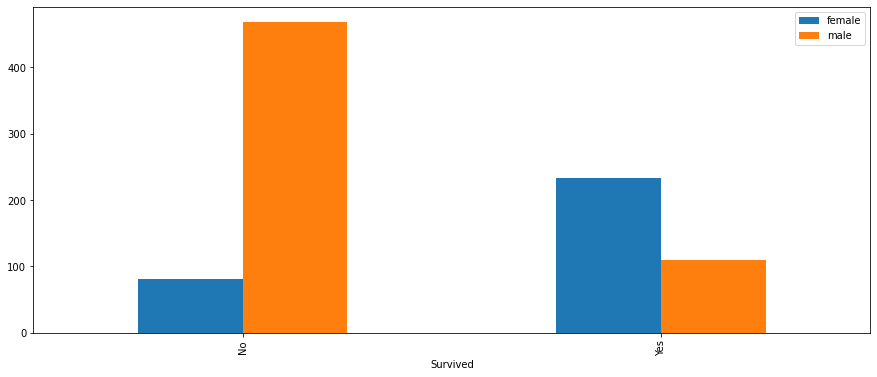

In [35]:
# ANSWER
bar_charts(titanic, 'Sex')

## Parch

Parch = Number of parents of children travelling with each passenger.

In [45]:
# ANSWER

## SibSp

## Embarked

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [37]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [61]:
# ANSWER
create_fare_class(titanic['Fare'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Age Class

In [48]:
# ANSWER

In [56]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [58]:
create_age_class(age_list)#can't compere list with integer

TypeError: '>' not supported between instances of 'list' and 'int'

In [69]:
# ANSWER
ages = titanic['Age']
age_list = []
count_list=[]
for age in ages:
    x=create_age_class(age)
    age_list.append(x)
    count=len(titanic[titanic['Age']==age])
    count_list.append(count)
#print(age_list, count_list)

In [70]:
age_df=pd.DataFrame({'Ages': ages, 'ageClass':age_list,'Count':count_list, 'survived':titanic['Survived']})
age_df

,Ages,ageClass,Count,survived
0,22.0,2,27,0
1,38.0,4,11,1
2,26.0,3,18,1
3,35.0,3,18,1
4,35.0,3,18,0
...,...,...,...,...
886,27.0,3,18,0
887,19.0,2,25,1
888,28.0,3,198,0
889,26.0,3,18,1


In [68]:
group = age_df.groupby(['ageClass'])['survived'].sum()
group

ageClass
1     57
2     69
3    133
4     78
5      5
Name: survived, dtype: int64

# Staistical Overview

## Correlation

Find correlation between `survived` and other features.

In [42]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.037932,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.066035,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.343270,0.083081,0.018443,-0.549500
Age,0.037932,-0.066035,-0.343270,1.000000,-0.246937,-0.178103,0.096348
SibSp,-0.057527,-0.035322,0.083081,-0.246937,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.178103,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096348,0.159651,0.216225,1.000000


# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [52]:
# ANSWER

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [53]:
# ANSWER

### Calculate point estimate

In [54]:
a = titanic_young['Survived']
b = titanic_old['Survived']

NameError: name 'titanic_young' is not defined

In [55]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

NameError: name 'a' is not defined

### Calculate test statistic

In [56]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

NameError: name 'a' is not defined

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [57]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

NameError: name 'N' is not defined

In [58]:
print("t = " + str(t))
print("p = " + str(2*p))

NameError: name 't' is not defined

### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [59]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [60]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

NameError: name 'stats' is not defined



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



